In [60]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm_notebook as tqdm
import pickle as pkl

In [5]:
csv_file = "./csv_pkl_files/4_fold_whole_train_wo_sus.csv"
df = pd.read_csv(csv_file)

In [160]:
img_dir = "./panda-36x256x256-tiles-data-opt/train_norm/"
mask_dir = "./panda-36x256x256-tiles-data-opt/masks"
# mask_label_dict = {"radboud":{}, "karolinska":{}}
# pix_intensity_dict = {"radboud":{"0":(0,0),"1":(0,0), "2":(0,0),"3":(0,0), "4":(0,0), "5":(0,0)}, 
#                        "karolinska":{"0":(0,0), "1":(0,0), "2":(0,0)}}

mean_pix = []
for i in tqdm(range(len(df))):
    img_id, tile_number, provider = df.loc[i, "image_id"], df.loc[i, "tile_number"], df.loc[i, "data_provider"]
    mask_label_dict[provider][img_id] = []
#     s = ""
    for j in range(tile_number):
        try:
            image = Image.open(os.path.join(img_dir, f"{img_id}_{j}.png")).convert("RGB")
#             mask = Image.open(os.path.join(mask_dir, f"{img_id}_{j}.png")).convert("RGB")
        except:
            continue
        image = np.asarray(image)
#         s += str(255 - np.mean(image).astype("int")) + ","
#         mask = np.asarray(mask)[:,:,0]
#         mask_label_dict[provider][img_id].append(np.max(mask))
#         pix_intensity_dict[provider][str(np.max(mask))] = (pix_intensity_dict[provider][str(np.max(mask))][0] + np.mean(image),
#                                                            pix_intensity_dict[provider][str(np.max(mask))][1] + 1)

        image = image / 255.0
        mean_pix.append(np.mean(image, axis = (0, 1)))
#         break
#     if i == 5:
#         break
#     df.loc[i, "tile_pixel"] = s
#     break
#     if i == 10:
#         break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [161]:
mean_pix = np.asarray(mean_pix)

In [166]:
c_mean = np.mean(mean_pix, axis = 0)
c_var = np.std(mean_pix, axis = 0)

In [172]:
img = (np.zeros((10,10,3)) - c_mean)/c_var

In [173]:
img

array([[[-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726]],

       [[-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-11.34591513,  -4.26391002,  -8.97536726],
        [-

In [167]:
c_mean, c_var

(array([0.79667089, 0.59347025, 0.75775308]),
 array([0.07021654, 0.13918451, 0.08442586]))

In [143]:
df.head(20)

,image_id,data_provider,isup_grade,gleason_score,tile_number,split,tile_pixel
0,9716b5d2e13a28be3dc836134153720c,radboud,4,4+4,7,1.0,"121,109,111,86,81,79,77,"
1,0954f0bb123cf3be8b00c9c989dcf3d6,karolinska,0,0+0,43,1.0,"152,141,135,134,127,128,128,123,126,122,117,11..."
2,d861180850ca54282b38c782734a7dc7,karolinska,0,0+0,39,0.0,"89,82,72,67,70,69,69,60,61,69,68,69,58,57,60,6..."
3,459154b1334d073cfef8af95362a7051,karolinska,0,0+0,34,1.0,"112,103,102,99,92,89,97,90,94,88,83,83,82,79,7..."
4,27489a7f1972687cccb1258116ff7f10,karolinska,0,0+0,24,0.0,"105,101,101,92,87,85,84,89,86,83,81,77,73,80,7..."
5,fb5fd7ab15e699998a30b36fe169431b,radboud,3,4+3,18,1.0,"112,115,116,99,116,101,105,108,85,106,103,97,9..."
6,06f714d78f6f5c545cd149cf71c7c1c1,karolinska,0,0+0,68,2.0,"73,67,69,67,67,61,60,64,66,62,65,63,59,54,66,6..."
7,f40c17b3402d3937434e08f419ebb3d9,radboud,4,3+5,32,3.0,"73,81,71,70,58,51,53,72,61,66,63,71,62,57,64,5..."
8,746cfe9ab71459d51eb0fbdb72348ae8,radboud,5,5+4,20,3.0,"129,112,104,99,97,86,86,91,90,77,88,76,75,74,5..."
9,2f64fb8c55543d67a8831f1b1a7a89c2,karolinska,4,4+4,43,2.0,"74,75,72,64,69,71,63,59,69,66,57,65,59,59,56,6..."


In [131]:
df.to_csv(csv_file)

In [139]:
s = str(df.loc[0, "tile_pixel"])
s = np.asarray(s.split(",")[:-1]).astype(int)
s

array([121, 109, 111,  86,  81,  79,  77])

In [142]:
np.argsort(s)[::-1][:2]

array([0, 2])

In [94]:
informed_tiles = {"radboud":[], "karolinska":[]}
for prv in mask_label_dict:
    for img_name in mask_label_dict[prv]:
        if prv == "radboud":
            th = 2
        else:
            th = 1
        isup_grade = df.loc[df.image_id == img_name, "isup_grade"]
        if int(isup_grade) > 0:
            informed_tiles[prv].append(np.sum(np.asarray(mask_label_dict[prv][img_name]) > th))

Text(0.5, 1.0, 'informed_cancerous_tile_number_radboud')

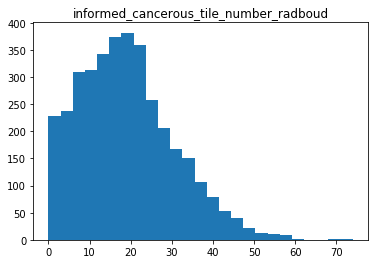

In [101]:
plt.hist(informed_tiles["radboud"], bins = 25)
plt.title("informed_cancerous_tile_number_radboud")

Text(0.5, 1.0, 'informed_cancerous_tile_number_karolinska')

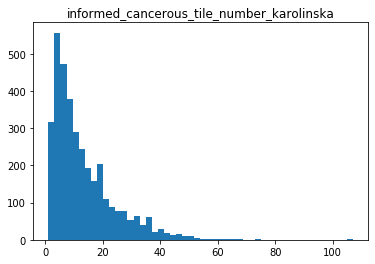

In [102]:
plt.hist(informed_tiles["karolinska"], bins=50)
plt.title("informed_cancerous_tile_number_karolinska")

In [100]:
s = str([1,2,3,45])
s.split(',')

['[1', ' 2', ' 3', ' 45]']

In [65]:
pix_intensity_dict_p = {"radboud":{"0":0,"1":0, "2":0,"3":0, "4":0, "5":0}, 
                       "karolinska":{"0":0, "1":0, "2":0}}
for prv in pix_intensity_dict:
    for grade in pix_intensity_dict[prv]:
        pix_intensity_dict_p[prv][grade] = pix_intensity_dict[prv][grade][0] / pix_intensity_dict[prv][grade][1]

In [66]:
pix_intensity_dict_p

{'radboud': {'0': 187.33152627575288,
  '1': 193.41127956249926,
  '2': 185.0654008100413,
  '3': 177.28456576847304,
  '4': 179.65991338666808,
  '5': 184.3245805288042},
 'karolinska': {'0': 196.10129972540753,
  '1': 182.0271881161454,
  '2': 178.18201151902815}}

Text(0.5, 1.0, 'radboud mean pix v.s isup grade after norm')

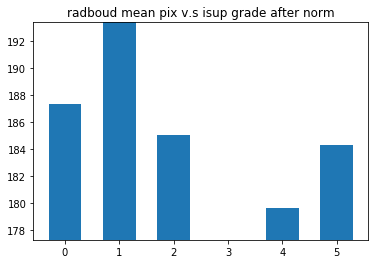

In [68]:
provider = 'radboud'
x = list(pix_intensity_dict_p[provider].keys())
data = list(pix_intensity_dict_p[provider].values())
plt.bar(x, data, width=0.6)
plt.ylim(min(data), max(data))
plt.title(f"{provider} mean pix v.s isup grade after norm")

In [61]:
with open('./csv_pkl_files/opt_patch_mask_label.pkl', 'wb') as handle:
    pkl.dump(mask_label_dict, handle, protocol=pkl.HIGHEST_PROTOCOL)